In [18]:
import os
import numpy as np
import pandas as pd
from fx import hex_to_rgb, plotscat

# set static variables
dir_str = os.getcwd()
file_n = "/admission2.csv"
id_str = 'userID'

Read data and check data if there are missing data

In [19]:
# read data
data_str = dir_str + file_n
df = pd.read_csv(data_str, header = 0)
df.drop(id_str, axis = 1, inplace = True)

# numerical features & check if NaNs exist
types = df.dtypes
nums_i = (types == int)|(types == float)
nums = df.loc[:,nums_i]
print(nums.describe())
print("Number of NAs for numerical values:")
print(pd.isnull(nums).sum())

# non-numerical features & check if NaNs exist
n_nums = df.loc[:,~nums_i]
n_nums_cols = list(n_nums.columns)
print(n_nums.describe())
print("Number of NAs for non-numerical values:")
print(pd.isnull(n_nums).sum())

               age          IAT         self          HPC         perf
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000
mean     28.484000    29.050000     3.000000    10.532000    53.094000
std       5.632537     6.303748     1.414921     3.484411     2.819062
min      20.000000    15.000000     1.000000     5.000000    44.000000
25%      25.000000    25.000000     2.000000     8.000000    51.000000
50%      27.000000    30.000000     3.000000    10.000000    53.000000
75%      31.000000    33.000000     4.000000    13.000000    55.000000
max      50.000000    45.000000     5.000000    20.000000    62.000000
Number of NAs for numerical values:
age     0
IAT     0
self    0
HPC     0
perf    0
dtype: int64
         sex   edu  major  work
count   1000  1000   1000  1000
unique     2     6      2     2
top        M  Univ  False  True
freq     510   471    911   705
Number of NAs for non-numerical values:
sex      0
edu      0
major    0
work     0
dtype: int64


Seen above are the statistics of the read data - furthermore, there are no missing values.

EDA

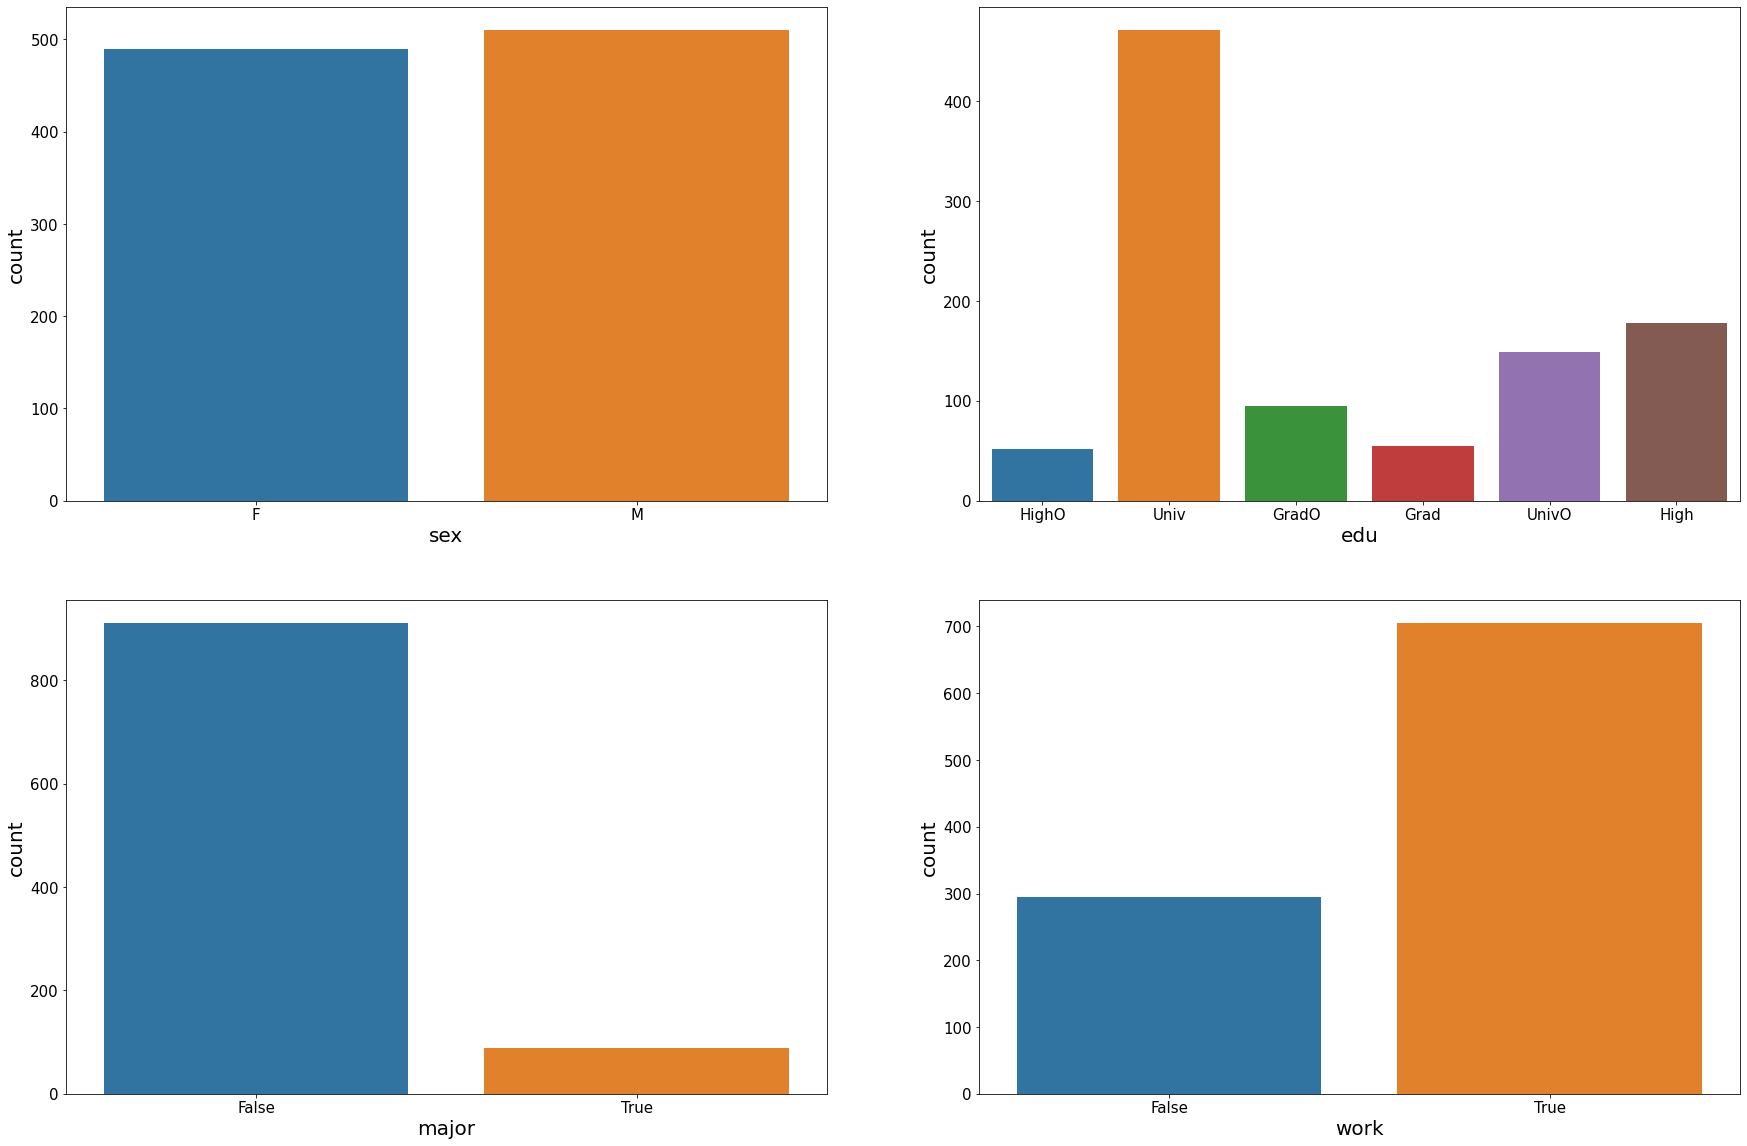

In [20]:
# Check number of values for every categorical variable
import seaborn as sns
import matplotlib.pyplot as plt
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(30,20))

sns.countplot(x="sex", data=n_nums, ax = ax1)
sns.countplot(x="edu", data=n_nums, ax = ax2)
sns.countplot(x="major", data=n_nums, ax = ax3)
sns.countplot(x="work", data=n_nums, ax = ax4)
ax1.xaxis.get_label().set_fontsize(20)
ax2.xaxis.get_label().set_fontsize(20)
ax3.xaxis.get_label().set_fontsize(20)
ax4.xaxis.get_label().set_fontsize(20)
ax1.yaxis.get_label().set_fontsize(20)
ax2.yaxis.get_label().set_fontsize(20)
ax3.yaxis.get_label().set_fontsize(20)
ax4.yaxis.get_label().set_fontsize(20)
ax1.tick_params(labelsize=15)
ax2.tick_params(labelsize=15)
ax3.tick_params(labelsize=15)
ax4.tick_params(labelsize=15)

plt.show()

<AxesSubplot:xlabel='work', ylabel='count'>

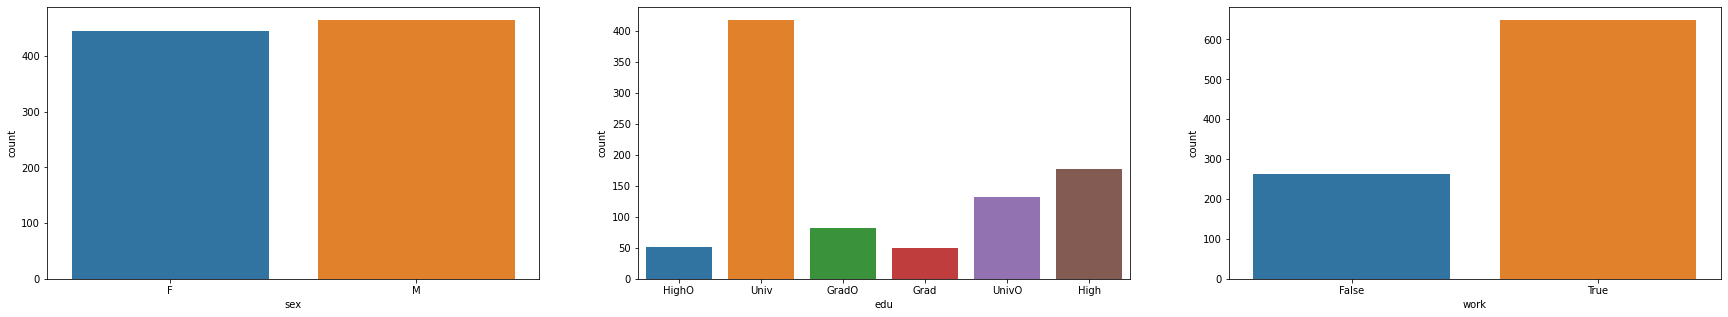

In [21]:
fig, axs = plt.subplots(ncols=3, figsize=(30,5))
sns.countplot(x="sex", data=n_nums[n_nums["major"] == False], ax = axs[0])
sns.countplot(x="edu", data=n_nums[n_nums["major"] == False], ax = axs[1])
sns.countplot(x="work", data=n_nums[n_nums["major"] == False], ax = axs[2])

<AxesSubplot:xlabel='major', ylabel='IAT'>

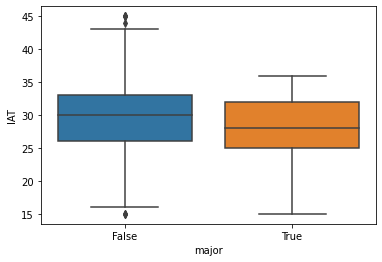

In [22]:
sns.boxplot(x='major', y='IAT', data=df[df["work"] == False])

<AxesSubplot:xlabel='work', ylabel='count'>

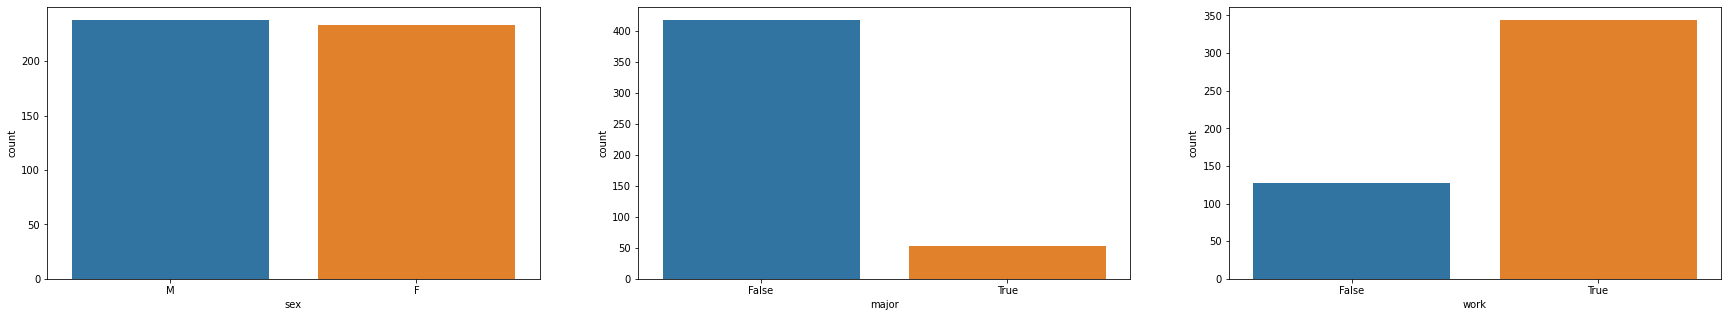

In [23]:
fig, axs = plt.subplots(ncols=3, figsize=(30,5))
sns.countplot(x="sex", data=n_nums[n_nums["edu"] == 'Univ'], ax = axs[0])
sns.countplot(x="major", data=n_nums[n_nums["edu"] == 'Univ'], ax = axs[1])
sns.countplot(x="work", data=n_nums[n_nums["edu"] == 'Univ'], ax = axs[2])

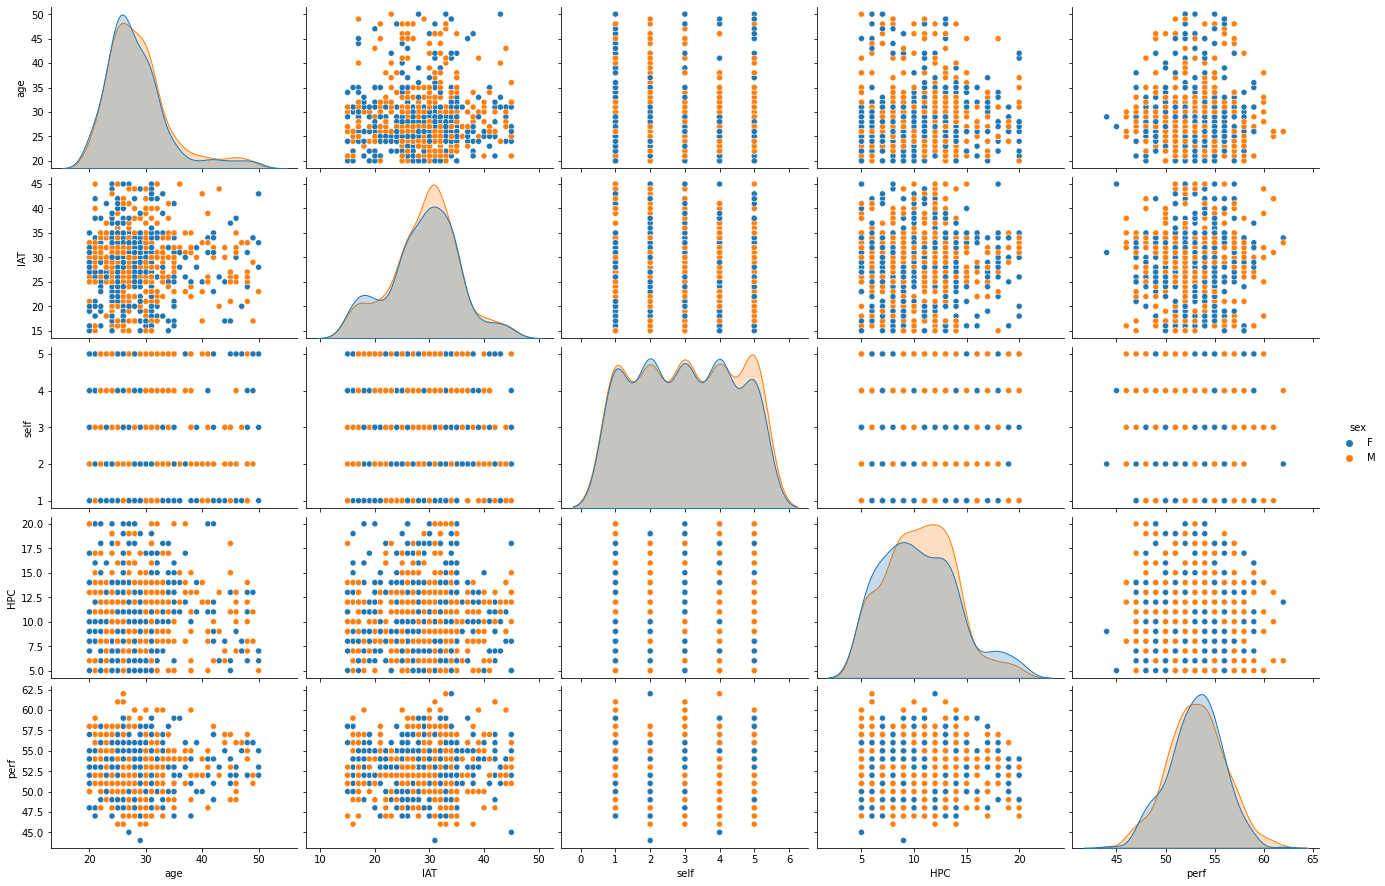

In [24]:
# Check gender vs. features
sns.pairplot(df.drop(['edu','major','work'], axis = 1), hue='sex', aspect=1.5)
plt.show()

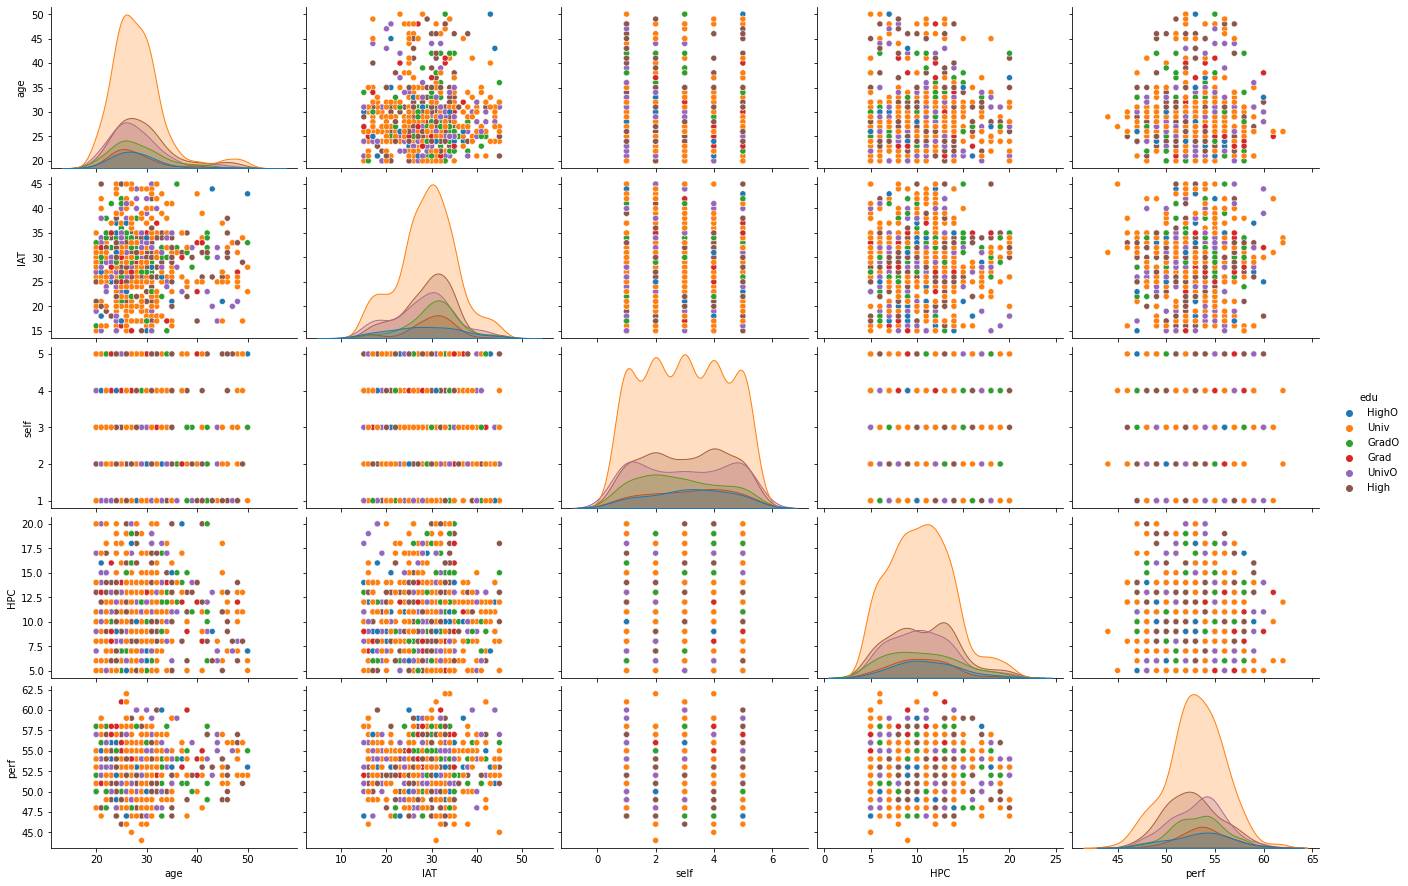

In [25]:
# Check education vs. features
sns.pairplot(df.drop(['sex','major','work'], axis = 1), hue='edu', aspect=1.5)
plt.show()

<AxesSubplot:xlabel='edu', ylabel='IAT'>

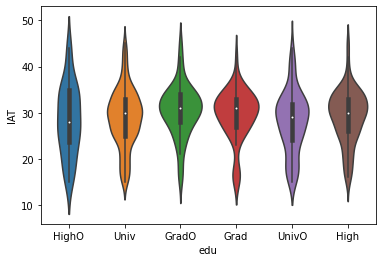

In [26]:
sns.violinplot(x='edu', y='IAT', data=df)

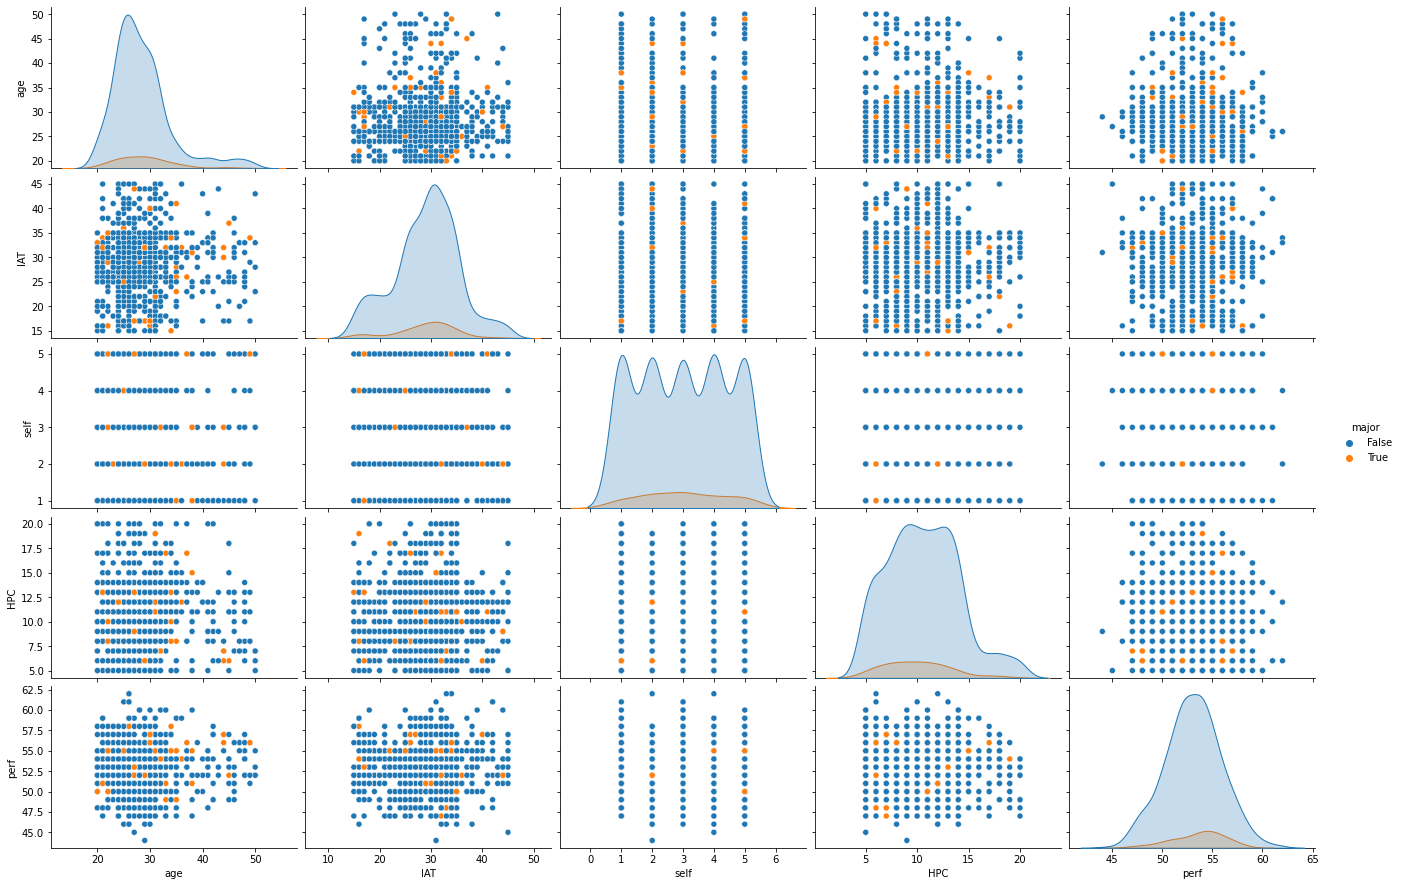

In [27]:
# Check major vs. features
sns.pairplot(df.drop(['sex','edu','work'], axis = 1), hue='major', aspect=1.5)
plt.show()

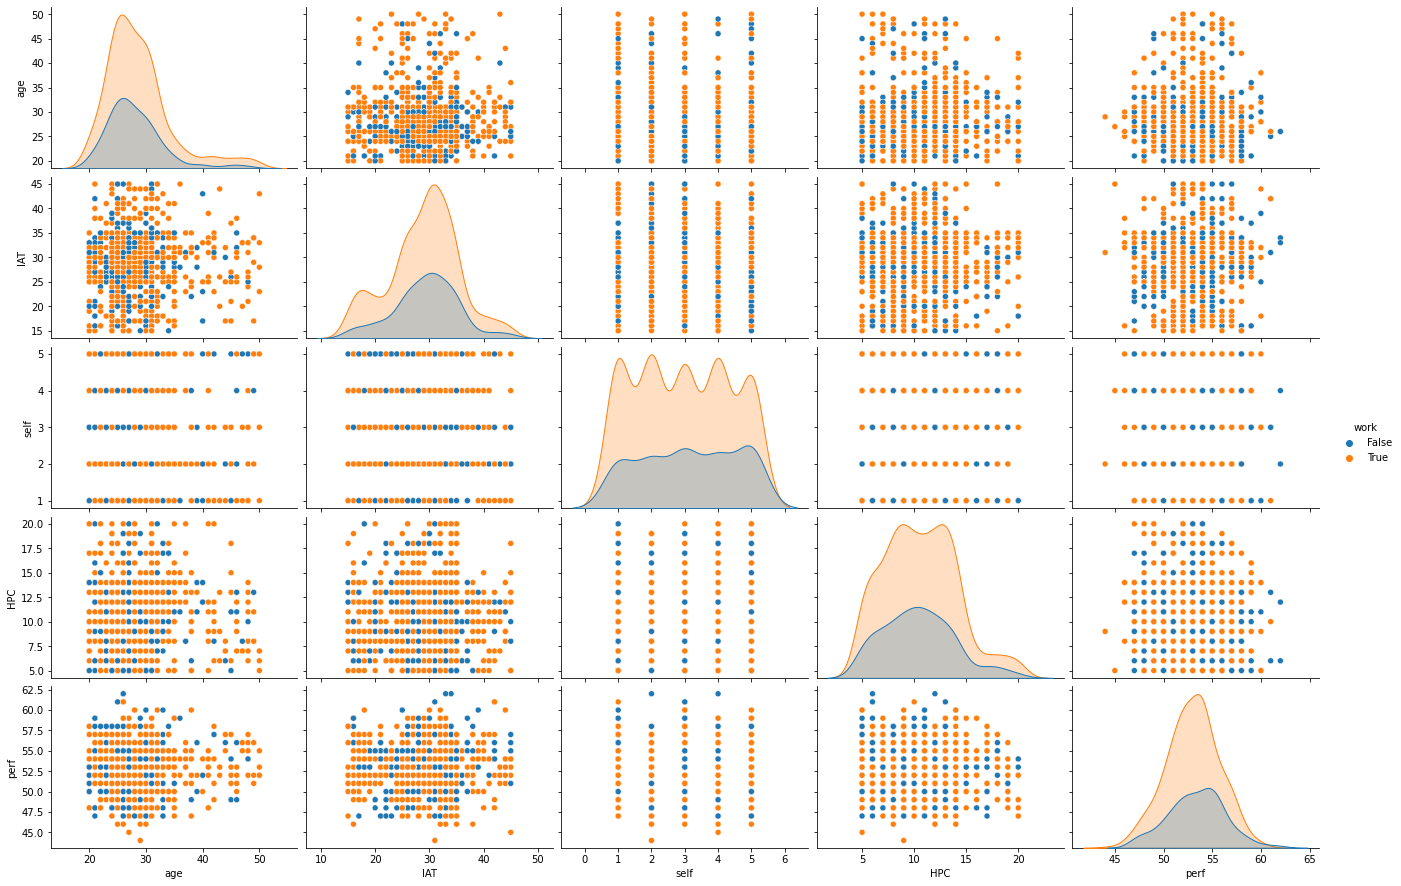

In [28]:
# Check work vs. features
sns.pairplot(df.drop(['sex','edu','major'], axis = 1), hue='work', aspect=1.5)
plt.show()

Pre-processing

In [29]:
# duplicate variable
n_nums_enc = n_nums.copy()

In [30]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()

# gender, major and work features are binary
n_nums_enc.loc[:,"sex_e"] = ord_enc.fit_transform(n_nums_enc[["sex"]])
n_nums_enc.loc[:,"major_e"] = ord_enc.fit_transform(n_nums_enc[["major"]])
n_nums_enc.loc[:,"work_e"] = ord_enc.fit_transform(n_nums_enc[["work"]])

In [31]:
# One hot encoding for education
n_nums_enc.loc[:,"edu1"] = n_nums_enc.loc[:,"edu"]
n_nums_enc = pd.get_dummies(n_nums_enc , columns = ['edu1'])
print(n_nums_enc)

edu_cols = [col for col in n_nums_enc if col.startswith('edu1')]

    sex    edu  major   work  sex_e  major_e  work_e  edu1_Grad  edu1_GradO  \
0     F  HighO  False   True    0.0      0.0     1.0          0           0   
1     M   Univ  False   True    1.0      0.0     1.0          0           0   
2     M   Univ  False   True    1.0      0.0     1.0          0           0   
3     F   Univ  False   True    0.0      0.0     1.0          0           0   
4     F   Univ  False   True    0.0      0.0     1.0          0           0   
..   ..    ...    ...    ...    ...      ...     ...        ...         ...   
995   F   Univ  False  False    0.0      0.0     0.0          0           0   
996   M   Univ  False   True    1.0      0.0     1.0          0           0   
997   M   High  False   True    1.0      0.0     1.0          0           0   
998   M   Univ  False   True    1.0      0.0     1.0          0           0   
999   F   High  False   True    0.0      0.0     1.0          0           0   

     edu1_High  edu1_HighO  edu1_Univ  edu1_UnivO  

In [32]:
# merge numerical values and encoded values
nums_ext = pd.merge(nums, n_nums_enc, left_index = True, right_index= True)
print(nums_ext.head())

   age  IAT  self  HPC  perf sex    edu  major  work  sex_e  major_e  work_e  \
0   27   27     3   11    53   F  HighO  False  True    0.0      0.0     1.0   
1   30   31     1    8    47   M   Univ  False  True    1.0      0.0     1.0   
2   31   19     5    8    54   M   Univ  False  True    1.0      0.0     1.0   
3   30   27     4   17    53   F   Univ  False  True    0.0      0.0     1.0   
4   40   25     2   12    50   F   Univ  False  True    0.0      0.0     1.0   

   edu1_Grad  edu1_GradO  edu1_High  edu1_HighO  edu1_Univ  edu1_UnivO  
0          0           0          0           1          0           0  
1          0           0          0           0          1           0  
2          0           0          0           0          1           0  
3          0           0          0           0          1           0  
4          0           0          0           0          1           0  


In [33]:
%store nums_ext
%store n_nums_cols
%store edu_cols

Stored 'nums_ext' (DataFrame)
Stored 'n_nums_cols' (list)
Stored 'edu_cols' (list)
